---
# 4. Simulation
---

In my simulation study I want to analyze how the variance of the PCR coefficients differ if the true VCV matrix is not known by applying the model introduced in section three. Since the covariances of some model variables are not really trackable and to have a realistic set-up, I decided to simulate a true population from which I will subsequently draw different samples for my analysis to examine the behavior of the parameter variance. 

## 4.1 Description of the whole Population

First I simulate the whole population. The full parameterization is given and justified in a table in the appendix *A.10*. I have wrapped the whole data generating process in a function. The whole function can be found in the Github repository's folder ['R'](https://github.com/manuhuth/PCR-Parameter-Variance-Analysis/tree/master/R) in the file *DGP_function*. Since the data set is very large I decided to simulate it in advance and upload the data to Github. The code I used to simulate is given in the next cell. I have listed the inputs in the same order as they appear in Table X.X. The function additionally allows to tune the optimization to obtain the logarithmic wage. 

In [2]:
#At the end set this on top of the notebook
options(repr.plot.width=8, repr.plot.height=4) #adjust plots

setwd('C:/Users/Mhuth/Desktop/PCRPVA')
files <- c('PCA_PropVar', 'PCA', 'PCR_cv', 'PCR_predict', 'PCR', 'random_discreteVariables', 'random_VCV', 'DGP_function', 'plot_functions', 'coef_var_analysis') #names of files to read
for (i in 1:length(files)) { #loop to read all files
  source(paste('R/', files[i], '.R', sep = ''))
}

library(readxl)
library(gridExtra)
library(ggplot2) #whole cell later at the beginning

In [3]:
set.seed(123)
N <- 2300000
#population <- dgp_model(var_ability = 1, max_age = 68, min_age = 33, n = N, prob_numbSiblings = 0.1, mean_numberSiblings = 1.692, var_numberSiblings = 2.89,
#                      mean_parent_educ = 13.342, variance_parent_educ = 21.215,
#                      gamma_ability = 2,  gamma_parent_educ = 2,
#                      breaks_test7_m = c(0, 0.141, 0.158, 0.185, 0.190, 0.212),  breaks_test11_m = c(0, 0.122,0.152, 0.157, 0.179, 0.199),
#                      breaks_test7_r =  c(0, 0.166, 0.179, 0.188, 0.187, 0.165),  breaks_test11_r = c(0, 0.132, 0.163, 0.163, 0.176, 0.176), test_cat = TRUE, var_err = 1,
#                      beta_min = c(0.03, 0.01, -0.06, -10, 0.01), mean_wage = 2.040, variance_wage = 1.5,  beta_max = c(0.06, 0.06, -0.03, 10, 10), tau = 0.5,  
#                      max_yearsSchooling = 29,  mean_schooling = 13.342, variance_schooling = 21.215, min_yearsSchooling = 0, q = 0.85,
#                      age_school_count = 4, probs_gap = c(0.59, 0.11,0.7,0.04, 0.03), gap_years = c(0,1,2,3,4))

load("SimData/population2Mio.RData")
X <- population[c('test7_m', 'test11_m', 'test7_r', 'test11_r', 'parent_educ', 'schooling', 'working')]
X <- cbind(X, X$working^2/100)
colnames(X) <- c(c('test7_m', 'test11_m', 'test7_r', 'test11_r', 'parent_educ', 'schooling','working', 'working_squ'))

**TO-DO** histograms of unstandardized variables to appendix

Since I use standardized variables for PCA and PCR I only report the variance-covariance matrix of the standardized variables. The function *scale* uses $N-1$ in the denominator to compute variances and covariances. Since I set the data as the whole population the denominator should actually be $N$. However, this error cancels out by dividing by $(N-1)$ in the subsequent line yielding the true standardized population variance-covariance matrix.  

In [4]:
trans <- 'normalized' #saved for later purposes
X_stand <- scale(X, center = TRUE, scale = FALSE)  
VCV <- t(X_stand)%*%X_stand/(N-1) 

**TO-DO** Description of VCV matrix

**Table X.X - Variance-Covariance Matrix of the Standardized Variables for the whole Population**

In [8]:
VCV

,test7_m,test11_m,test7_r,test11_r,parent_educ,schooling,working,working_squ
test7_m,1.9473407,1.1482263,1.619954,0.9973216,3.976747,4.317450,-4.327757,-2.626950
test11_m,1.1482263,0.8110029,1.002062,0.6392506,2.578105,2.785373,-2.789010,-1.686538
test7_r,1.6199544,1.0020624,1.909088,1.1185382,3.971368,4.307425,-4.313773,-2.605157
test11_r,0.9973216,0.6392506,1.118538,0.7917484,2.548773,2.754018,-2.758094,-1.663971
parent_educ,3.9767467,2.5781051,3.971368,2.5487730,21.200925,17.969836,-17.962290,-10.653355
schooling,4.3174497,2.7853733,4.307425,2.7540176,17.969836,18.467078,-18.465220,-10.984864
working,-4.3277566,-2.7890103,-4.313773,-2.7580937,-17.962290,-18.465220,120.577031,74.204514
working_squ,-2.6269497,-1.6865381,-2.605157,-1.6639712,-10.653355,-10.984864,74.204514,47.335083


From the variance-covariance matrix we can compute the true matrix of eigenvectors $\pmb \phi$ and eigenvalues $\lambda$.

In [5]:
phi <- eigen(VCV)$vectors
lambda <- eigen(VCV)$values

**Table X.X - Eigenvectors of the whole Population Variance-Covariance Matrix of the Standardized Variables**

In [10]:
phi

-0.03675433,-0.15307398,-0.46664897,-0.2930177,0.2308707,0.598732542,-0.3466772871,0.3736706138
-0.02366142,-0.09856687,-0.27963943,-0.1639509,0.1325675,0.356409118,0.5852655779,-0.6304832963
-0.03659786,-0.15267955,-0.45617829,-0.2725824,0.2300145,-0.617420798,-0.3717663582,-0.3473102748
-0.02338357,-0.09740005,-0.27365749,-0.1543476,0.1304968,-0.364917633,0.6315289204,0.5850057769
-0.15405640,-0.69225266,0.56896420,-0.3450526,0.2329568,-0.001414988,0.0006432808,0.0001584817
-0.15520785,-0.63481806,-0.31081990,0.5425569,-0.4262204,0.006041991,-0.0154095611,0.0013339258
0.82749304,-0.18298195,-0.02010457,-0.3207113,-0.4224802,-0.004691595,0.0007587696,-0.0009135113
0.51345446,-0.13551752,0.01788865,0.5223517,0.6669080,0.007618670,-0.0012709883,0.0015034782


## 4.2 Convergence of Eigenvectors and Eigenvalues

### 4.2.1 A Simple 2-Dimensional Graphical Illustration

Since the eigenvectors are 8-Dimensional, they cannot be illustrated in a graph. Hence, I decided to start with a 2-dimensional case to give a first intuition how $\hat{\pmb \phi}$ converges to $\pmb \phi$ if he sample size increases. Moreover, since the direction is invariant to the choice of the representant of $[\phi]$ the implementation in the two dimensional case is straightforward. For this purpose I decided to use the variables *years of schooling* and *years of parent's education*. I chose these two variables since they have a high correlation of 0.9085 and had the same scale in the unstandardized set-up.   

In [15]:
X_2D <- X[ , c('parent_educ', 'schooling' )]
pca_2D <- PCA(X_2D, transform = trans)
phi_2D <- pca_2D$phi
plot_2D <- ggplot(as.data.frame(pca_2D$X_transformed[1:500,]), aes(parent_educ, schooling)) + geom_point() +
                geom_abline(aes(intercept = 0, slope = phi_2D[1,1]/phi_2D[2,1], colour = 'first eigenvector'), size = 1) +
                labs(colour = '') +
                scale_colour_manual(values=c('green', 'red')) +
                geom_abline(aes(intercept = 0, slope = phi_2D[1,2]/phi_2D[2,2], colour = 'second eigenvector'), size = 1)

**Table X.X - Eigenvectors of the VCV Matrix of Years of Parent's Education and Years of Schooling**

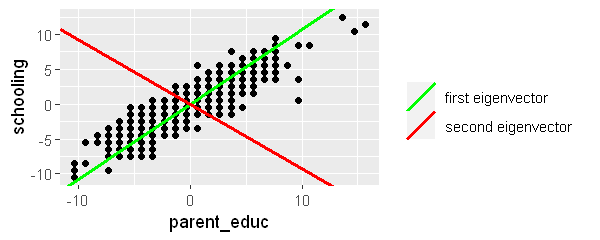

In [39]:
options(repr.plot.width=5, repr.plot.height=2) #adjust plots
plot_2D

average eigenvectors make no sense -> just increase sample size. Convergence in Probability?

In [17]:
set.seed(20)
sample_size_2D <- c(20, 100, 500, 2000, 5000, 8000) #determine number of each sample size
plots_2D <- lapply(sample_size_2D, plot_2D_data, true_phi = phi_2D, true_X = X_2D, legend = TRUE, transform = trans)
legend <- cowplot::get_legend(plots_2D[[1]] + theme(legend.position = "bottom")) #cowplot::otherwise cowplot's ggplot theme is loaded
p_grid <- cowplot::plot_grid(plotlist = plots_2D, ncol = 3)

**Table X.X - Convergence of the Direction of Eigenvectors of Years of Parent's Education and Years of Schooling by Increasing the Sample Size**

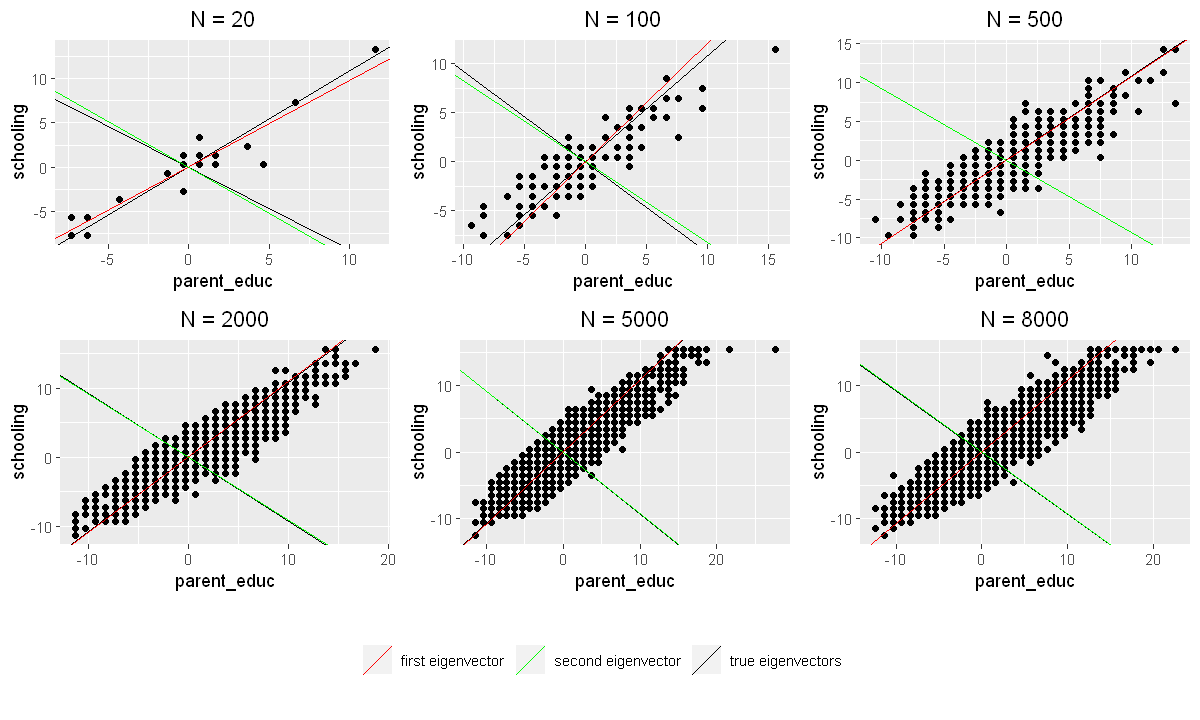

In [38]:
options(repr.plot.width=10, repr.plot.height=6) #adjust plots
cowplot::plot_grid(p_grid, legend, ncol = 1, rel_heights = c(1, 0.2))

## 4.3 Variance of the PCR Coefficients $\hat{\beta}$ in a Simulation Study

The question on how to compute the variance of the estimator arises. I will show two possibilities to compute the variance of the case using the $[\phi]$ class and the case using the estimated class of phi $[\hat{\phi}]$. If the notation $\hat{\beta}$ is used in this section, this indicates that the given statement holds for for $\hat{\beta_s}$ and $\hat{\beta_t}$. 


**Table X.X - Possibilities to Compute the Variance of $\beta$ and their Issues with non-uniquness of the Eigenvectors**


|      |   $[\phi]$   |   $[\hat{\phi}]$   |
|------|------|------|
|empirical distribution| no issue of uniquness  | $\hat{\pmb \phi}$ is not unique which increases the variance    |
|formula *(3.16)*/*(3.21)*|  $\pmb \phi$ is not unique but this does not cause problems since always the same $\pmb \phi$ is used |   no issue of uniquness since eigenvalues are unique   |



In [61]:
set.seed(12345)
M <- 8 # do it for all since it does not change the other
population_Y <- cbind(population$logwage, X)
sample_size <- seq(200, 10000, by = 200)

numb_it <- 400
#variance_analysis_results_cl <- lapply(sample_size, coef_var_analysis_cl, population = population_Y, true_phi = phi, M = M,
#                                       transform = trans, iterations = numb_it, print_it = TRUE)
#load data since its huge
load("SimData/variance_analysis_results_cl.Rda")

variance_plots_data <-  prepare_variance_plots(list_coef_var_analysis = variance_analysis_results_cl, sample_size = sample_size, confidence = 0.99)
xlab <- 'Sample Size'
ylab <- 'Variance Estimator'
numb_columns <- 3
col_prac_formula <- 'orange'
col_prac <- 'blue'
col_theo_formula <- 'green'
col_theo <- 'red'

What I do:
1. Difference between prac and prac with formula. would expect that prac is higehr due to problem of non-uniqueness of phi hat
2. Difference between theo and theo formula. would expect no difference since phi is chosen a priori
with one and two i have established that i can compare prac formula and theo formula
3. difference between prac formula and theo formula. what I wanted to look at.
4. show (for completeness how variance of Y changes)

explain everything briefly. with the formulas from section 3

**Table X.X - Variance of $\hat{\beta_s}$ (Stochastic Phi) Computed with Formula 3.23 vs. Variance of $\hat{\beta_s}$ (Stochastic Phi) Computed with Formula 3.24**  

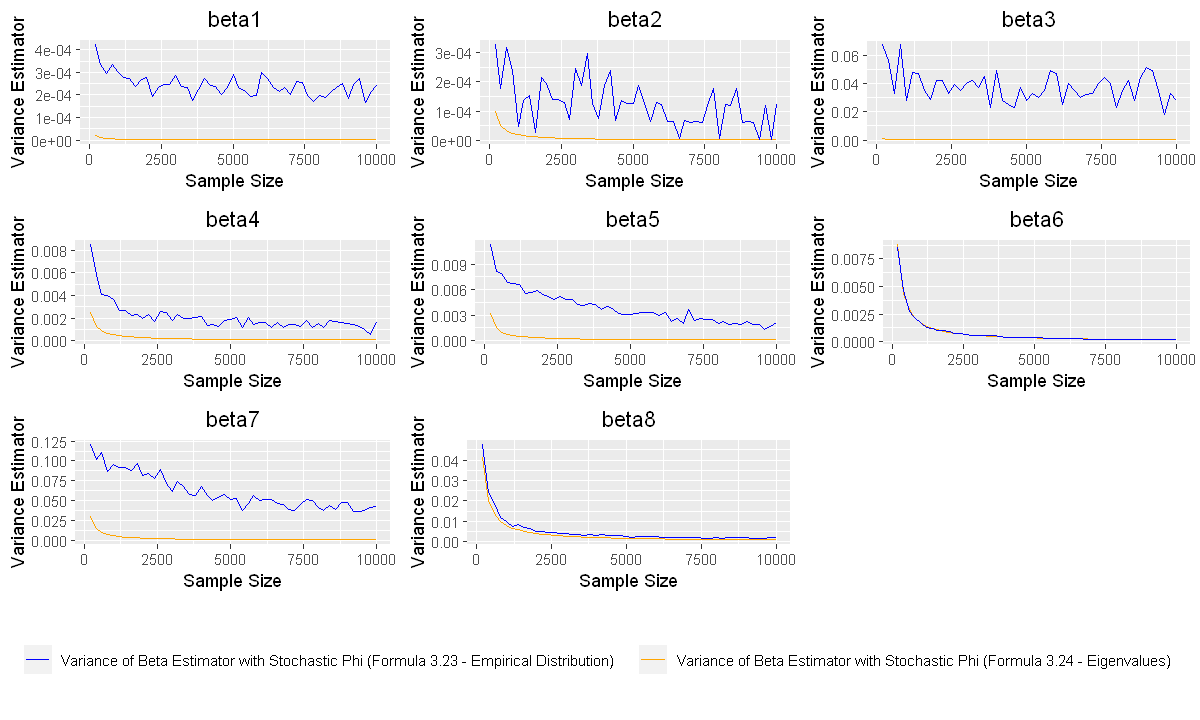

In [62]:
options(repr.plot.width=10, repr.plot.height=6) #adjust plots
plots_variance(df_1 = variance_plots_data$means_cl_prac_formula, legend_df1 = 'Variance of Beta Estimator with Stochastic Phi (Formula 3.24 - Eigenvalues)', colour_1 = col_prac_formula,
               df_2 = variance_plots_data$means_cl_prac, legend_df2 = 'Variance of Beta Estimator with Stochastic Phi (Formula 3.23 - Empirical Distribution)', colour_2 = col_prac,
               sample_size = sample_size, xlab_string = xlab, ylab_string = ylab, numb_columns = numb_columns, numb_plots = NULL)

**Table X.X - Variance of $\hat{\beta_t}$ (True Phi) Computed with Formula 3.23 vs. Variance of $\hat{\beta_t}$ (True Phi) Computed with Formula 3.25**  

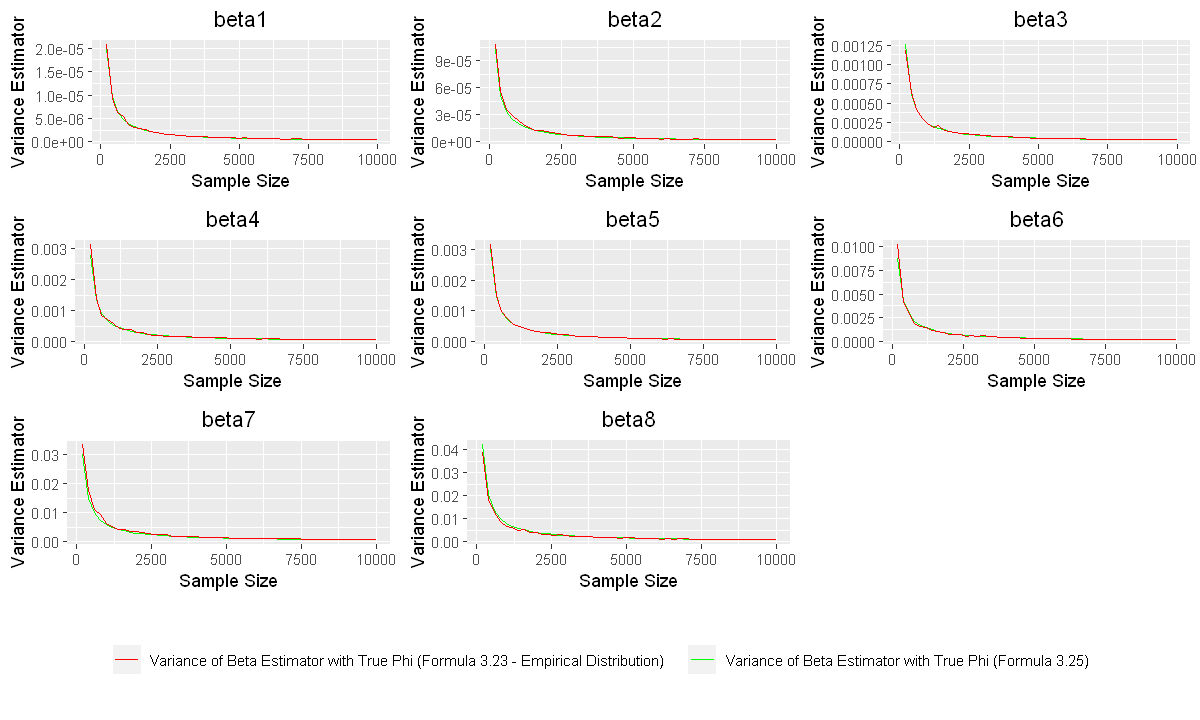

In [63]:
plots_variance(df_1 = variance_plots_data$means_cl_theo_formula, legend_df1 = 'Variance of Beta Estimator with True Phi (Formula 3.25)', colour_1 = col_theo_formula,
               df_2 = variance_plots_data$means_cl_theo, legend_df2 = 'Variance of Beta Estimator with True Phi (Formula 3.23 - Empirical Distribution)', colour_2 = col_theo,
               sample_size = sample_size, xlab_string = xlab, ylab_string = ylab, numb_columns = numb_columns, numb_plots = NULL)

**Table X.X - Variance of $\hat{\beta_t}$ (True Phi) Computed with Formula 3.25 vs. Variance of $\hat{\beta_s}$ (Stochastic Phi) Computed with Formula 3.24**  

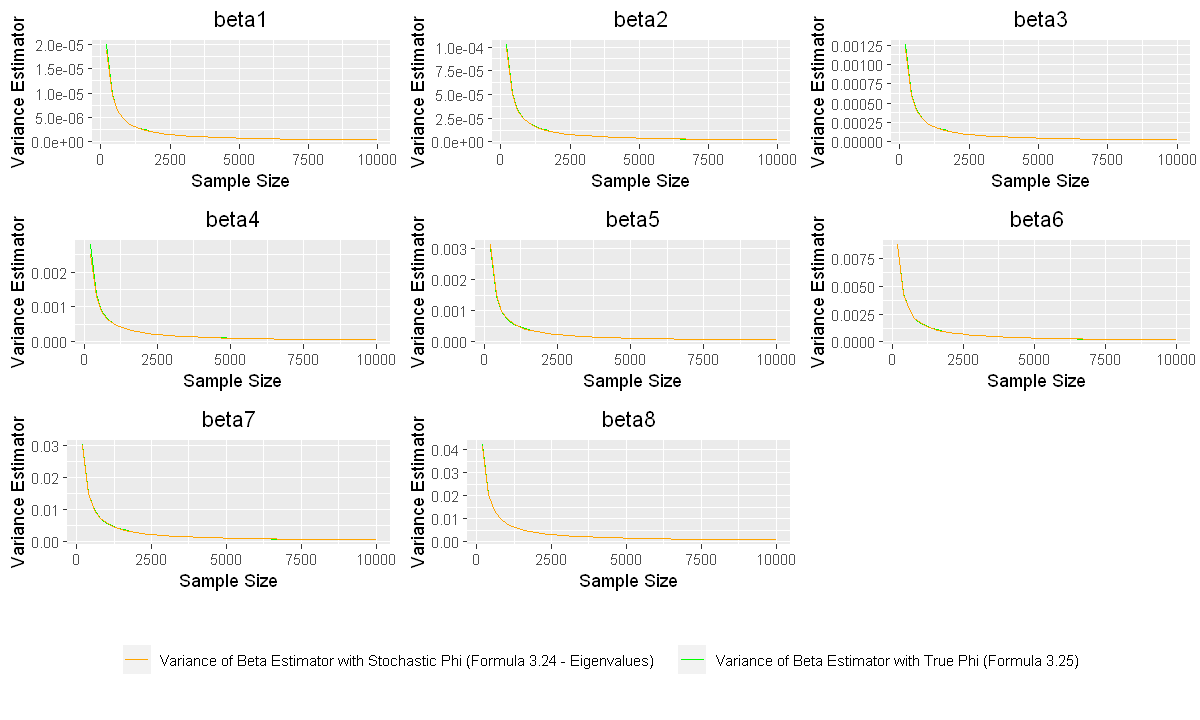

In [64]:
plots_variance(df_1 = variance_plots_data$means_cl_theo_formula, legend_df1 = 'Variance of Beta Estimator with True Phi (Formula 3.25)', colour_1 = col_theo_formula,
               df_2 = variance_plots_data$means_cl_prac_formula, legend_df2 = 'Variance of Beta Estimator with Stochastic Phi (Formula 3.24 - Eigenvalues)', colour_2 = col_prac_formula,
               sample_size = sample_size, xlab_string = xlab, ylab_string = ylab, numb_columns = numb_columns, numb_plots = NULL)

say that prac vs theo does not make sense, since prac has issue with choice of phi

In [6]:
sample_size <- c(50,80,100,150, seq(200, 5000, by = 200))
#set.seed(12345)
#population_Y <- cbind(population$logwage, X)
#M <- 8 # do it for all since it does not change the other
numb_it <- 400
#variance_analysis_results <- lapply(sample_size, coef_var_analysis, population = population_Y, true_phi = phi, M = M, transform = trans, iterations = numb_it, numb_iterations = 400)

load("SimData/variance_analysis_result.Rda")
confidence <- 0.99
variance_plots_data_CI <- lapply(c(1:(length(variance_analysis_results[[1]]))), prepare_variances_plots_CI, list_variances = variance_analysis_results,
                                            sample_size = sample_size, confidence = confidence, type_CI = 'mean', numb_it = numb_it)

xlab <- 'Sample Size'
ylab <- 'Mean of Variance Estimate'
numb_columns <- 3
col_prac_formula <- 'orange'
col_prac <- 'blue'
col_theo_formula <- 'green'
col_theo <- 'red'
xlab_string <- xlab
ylab_string <- ylab

**Table X.X - Variance of $\hat{\beta_s}$ (Stochastic Phi) Computed with Formula 3.23 vs. Variance of $\hat{\beta_s}$ (Stochastic Phi) Computed with Formula 3.24**  

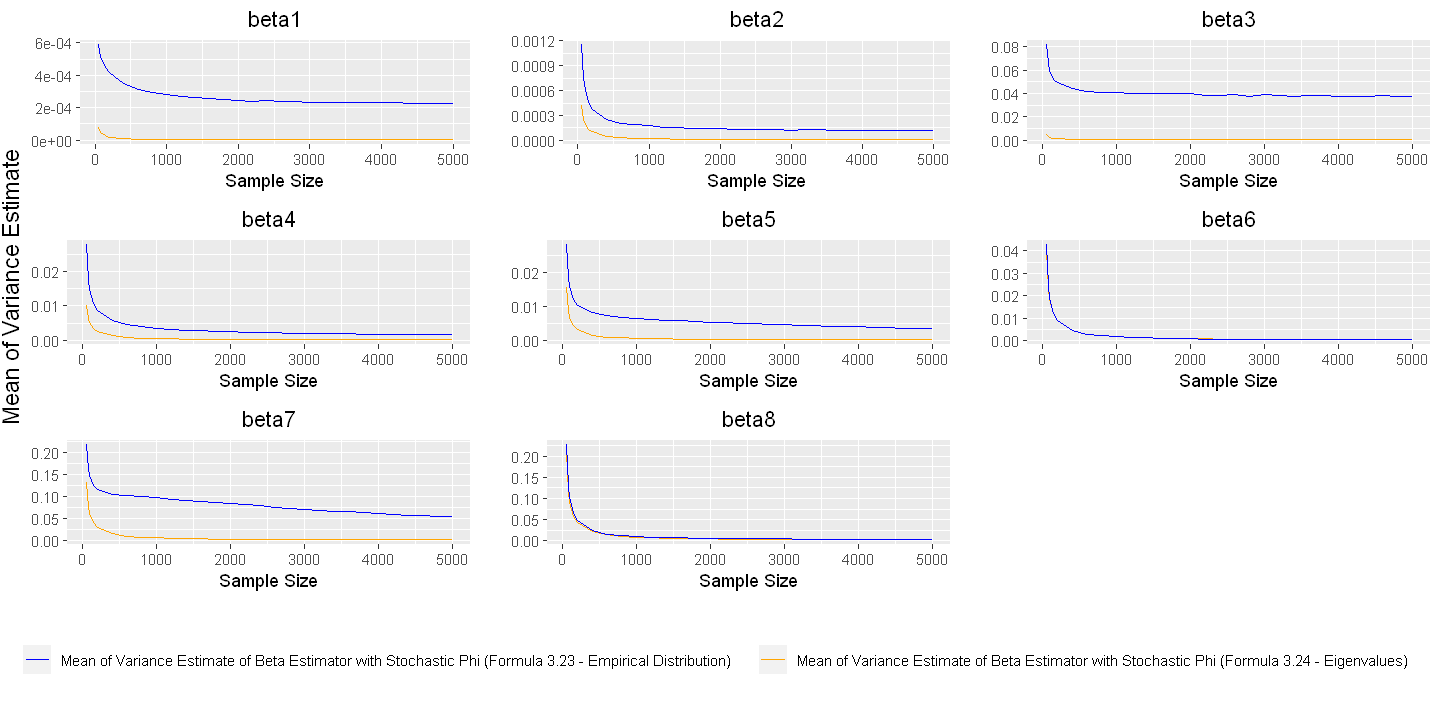

In [7]:
options(repr.plot.width=12, repr.plot.height=6) #adjust plots
plots_variance_CI(variance_plots_data = variance_plots_data_CI, first_method = 'beta_prac_formula', second_method = 'beta_prac',
                  colour_1 = col_prac_formula, colour_2 = col_prac, xlab_string = xlab, ylab_string = ylab,
                  legend_df1 = 'Mean of Variance Estimate of Beta Estimator with Stochastic Phi (Formula 3.24 - Eigenvalues)',
                  legend_df2 = 'Mean of Variance Estimate of Beta Estimator with Stochastic Phi (Formula 3.23 - Empirical Distribution)',
                  numb_columns = numb_columns, sample_size = sample_size, subtitle = 'beta')

**Table X.X - Variance of $\hat{\beta_t}$ (True Phi) Computed with Formula 3.23 vs. Variance of $\hat{\beta_t}$ (True Phi) Computed with Formula 3.25**  

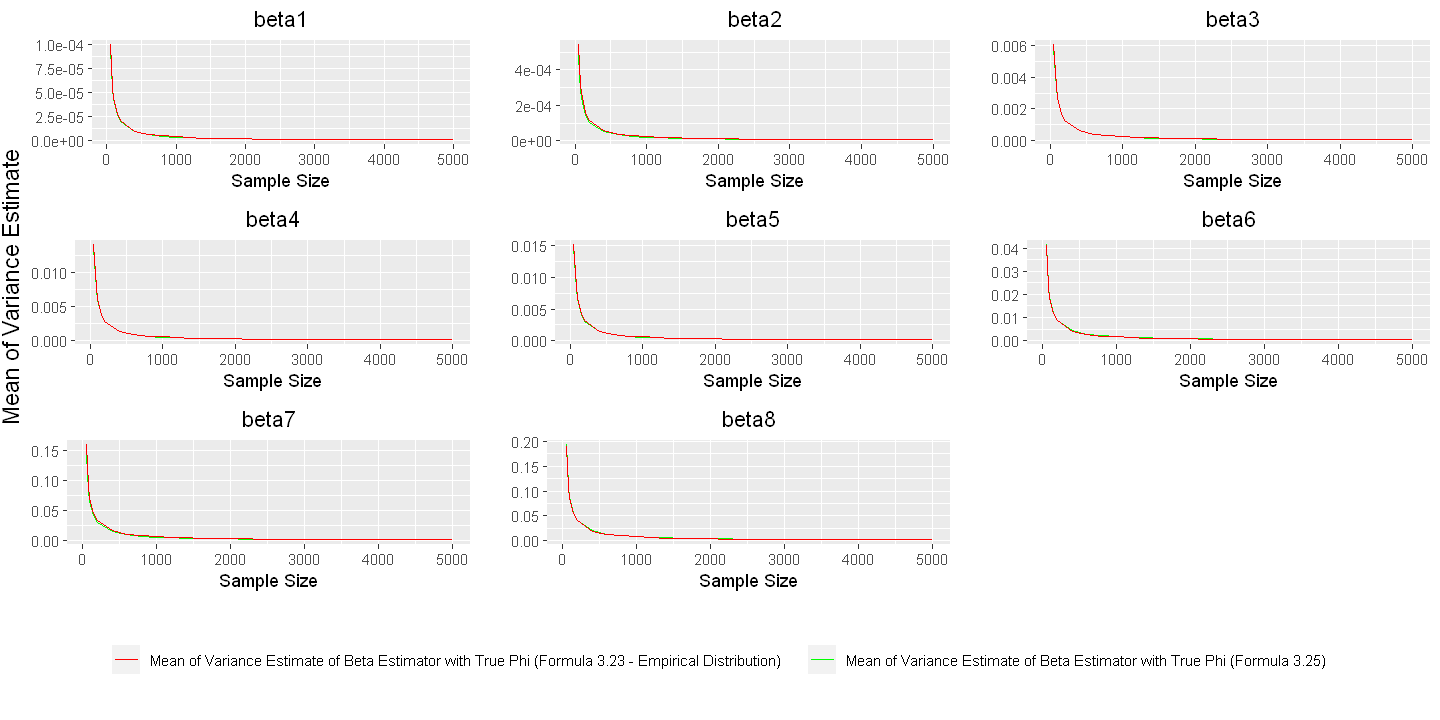

In [8]:
plots_variance_CI(variance_plots_data = variance_plots_data_CI, first_method = 'beta_theo_formula', second_method = 'beta_theo',
                  colour_1 = col_theo_formula, colour_2 = col_theo, xlab_string = xlab, ylab_string = ylab,
                  legend_df1 = 'Mean of Variance Estimate of Beta Estimator with True Phi (Formula 3.25)',
                  legend_df2 = 'Mean of Variance Estimate of Beta Estimator with True Phi (Formula 3.23 - Empirical Distribution)',
                  numb_columns = numb_columns, sample_size = sample_size, subtitle = 'beta')

**Table X.X - Variance of $\hat{\beta_t}$ (True Phi) Computed with Formula 3.25 vs. Variance of $\hat{\beta_s}$ (Stochastic Phi) Computed with Formula 3.24**  

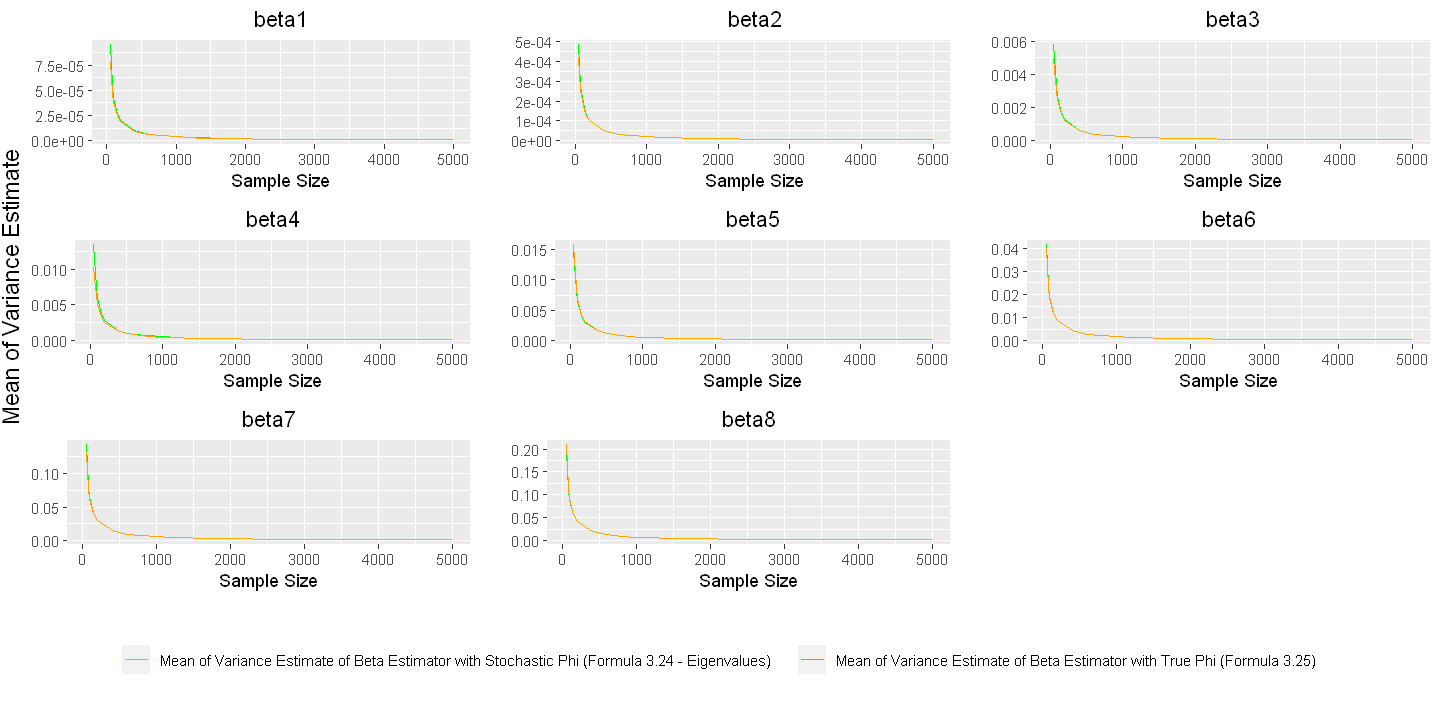

In [9]:
plots_variance_CI(variance_plots_data = variance_plots_data_CI, first_method = 'beta_theo_formula', second_method = 'beta_prac_formula',
                  colour_1 = col_theo_formula, colour_2 = col_prac_formula, xlab_string = xlab, ylab_string = ylab,
                  legend_df1 = 'Mean of Variance Estimate of Beta Estimator with True Phi (Formula 3.25)',
                  legend_df2 = 'Mean of Variance Estimate of Beta Estimator with Stochastic Phi (Formula 3.24 - Eigenvalues)',
                  numb_columns = numb_columns, sample_size = sample_size, subtitle = 'beta')

put one with 99 percent coverage in appendix

## 4.5 Variance of $\hat{Y}$

In [10]:
variances_Y_prac <- prepare_Y_variances(meth_interest = 'variances_Y_prac', list_variances = variance_analysis_results, confidence = confidence)
variances_Y_theo <- prepare_Y_variances(meth_interest = 'variances_Y_theo', list_variances = variance_analysis_results, confidence = confidence)
list_var_Y <- list(list('prac' = variances_Y_prac, 'theo' = variances_Y_theo))

**Table X.X - Variance of $\hat{Y}_t$ (True Phi) vs. Variance of $\hat{Y}_s$ (Stochastic Phi)**  

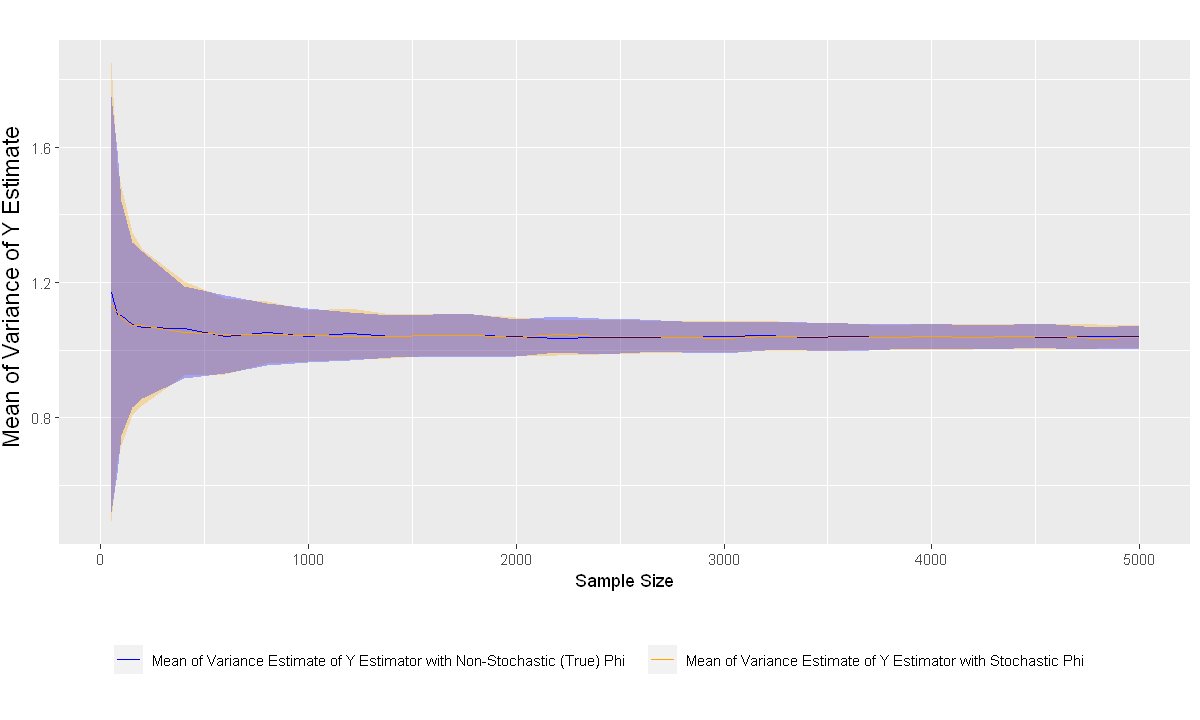

In [11]:
options(repr.plot.width=10, repr.plot.height=6) #adjust plots
plots_variance_CI(variance_plots_data = list_var_Y, first_method = 'theo', second_method = 'prac',
                  colour_1 = 'orange', colour_2 = 'blue', xlab_string = 'Sample Size', ylab_string = 'Mean of Variance of Y Estimate',
                  legend_df1 = 'Mean of Variance Estimate of Y Estimator with Non-Stochastic (True) Phi',
                  legend_df2 = 'Mean of Variance Estimate of Y Estimator with Stochastic Phi',
                  numb_columns = 1, sample_size = sample_size, subtitle = 'Y', make_subtitle = FALSE)